### 뭐.. 프롬프트를 같이 보자고하네?

In [1]:
import torch
from diffusers import StableDiffusionPipeline

/home/kk4ever/anaconda3/envs/hg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 기본 of 기본

In [2]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.47it/s]


##### 이사람 777 참 좋아해

In [5]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()
seed = 777

##### 교활한 assert...(감탄임)

In [9]:
from PIL import Image

def grid_img(imgs, rows=1, cols=3, scale=1):
    assert len(imgs) == rows * cols 

    w, h = imgs[0].size
    w, h = int(w*scale), int(h*scale)

    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        # img = img.resize((w,h), Image.ANTIALIAS) # module 'PIL.Image' has no attribute 'ANTIALIAS' 뜸
        img = img.resize((w,h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

##### 목표와 목적
... 유명한 걸 적으래

100%|██████████| 50/50 [00:01<00:00, 30.54it/s]


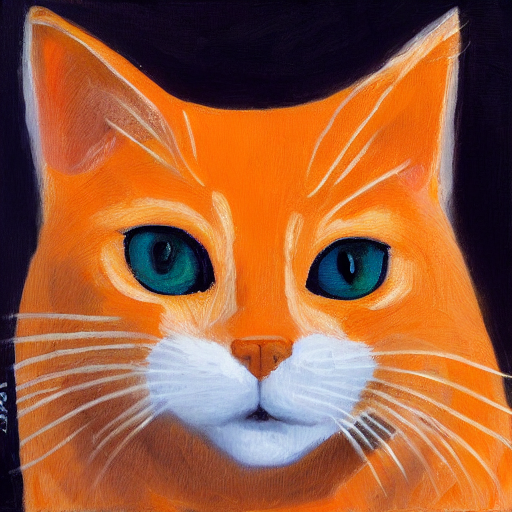

In [10]:
prompt = 'an orange cat'

generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, generator=generator).images[0]
img

100%|██████████| 50/50 [00:03<00:00, 15.55it/s]


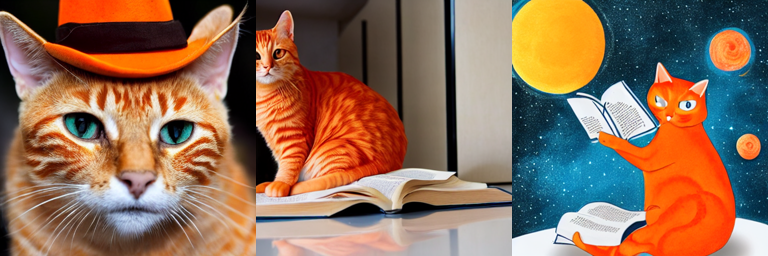

In [13]:
prompt = ['an orange cat wearing a hat',
          'an orange cat reading a book in the kitchen',
          'an orange cat reading a book in space']

generator = torch.Generator('cuda').manual_seed(seed)
imgs = pipe(prompt, generator=generator).images

grid = grid_img(imgs, rows=1, cols=len(prompt), scale=0.5) # module 'PIL.Image' has no attribute 'ANTIALIAS' 이 떠서 함수 고침!
grid

##### Type이라고 설명하지만 "photo", "oil painting", "drawing", 을 쓰면 바뀐다고 설명중
##### 그리고 나서 아래 키워드를 알려주는데, 이사람 분명 게임 좋아한다.
#### Useful keywords

> `Painting, Photo, Drawing, 3D rendering`, etc

> More specifics: `Oil painting, watercolor painting, Portrait, Sketch, Digital painting, Concept art, Ultra realistic illustration, Underwater portrait, Underwater steampunk`

100%|██████████| 50/50 [00:03<00:00, 15.01it/s]


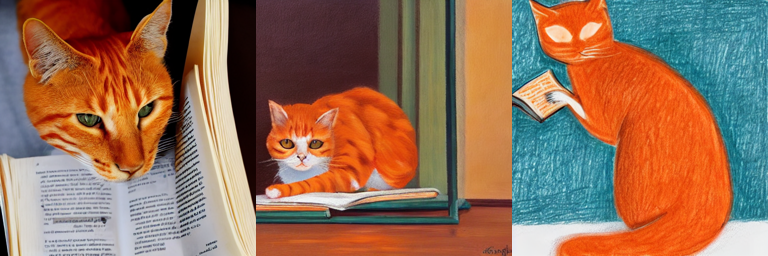

In [14]:
prompt = ["photo of an orange cat reading a book in the kitchen",
          "oil painting of an orange cat reading a book in the kitchen",
          "drawing of an orange cat reading a book in the kitchen"]

generator = torch.Generator("cuda").manual_seed(seed)
imgs = pipe(prompt, generator=generator).images

grid = grid_img(imgs, rows=1, cols=len(prompt), scale=0.5)
grid

['orange cat reading a book in space, oil painting', 'orange cat reading a book in space, digital painting', 'orange cat reading a book in space, underwater steampunk']


100%|██████████| 50/50 [00:03<00:00, 15.04it/s]


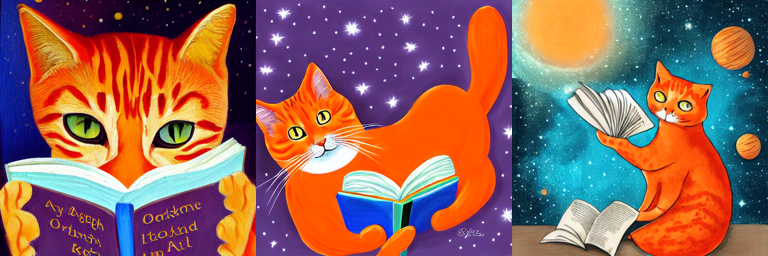

In [15]:
base = 'orange cat reading a book in space'

m_ = [', oil painting',
      ', digital painting',
      ', underwater steampunk']

prompts = []

for m in m_:
  prompts.append(base + m)

print(prompts)

generator = torch.Generator("cuda").manual_seed(seed)
imgs = pipe(prompts, generator=generator).images

grid = grid_img(imgs, rows=1, cols=len(prompts), scale=0.5)
grid

##### 이하 프롬프트 키워드 이야기 ... 참고만 하련다